In [18]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.applications.vgg16 import VGG16

from keras.applications.resnet50 import ResNet50

import warnings
warnings.filterwarnings('ignore')

In [4]:
train_dir="train/"
test_dir="test/"
train=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('no of training images ',train.shape[0])
print('no of test images ',test.shape[0])
train.head()

no of training images  364
no of test images  156


,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


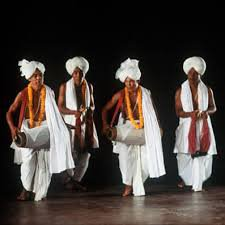

In [5]:
Image(os.path.join("train",train.iloc[0,0]),width=250,height=250)

In [7]:
datagen=ImageDataGenerator(rescale=1./255)
batch_size=128

In [9]:
train_generator=datagen.flow_from_dataframe(dataframe=train[:300],directory=train_dir,x_col='Image',
                                            y_col='target',class_mode='categorical',batch_size=batch_size,
                                            target_size=(224,224),color_mode='rgb')


validation_generator=datagen.flow_from_dataframe(dataframe=train[300:],directory=train_dir,x_col='Image',
                                                y_col='target',class_mode='categorical',batch_size=50,
                                                target_size=(224,224),color_mode='rgb')

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(dataframe=testdf,directory="./test/",x_col="id",y_col=None,
                                                        batch_size=32,seed=42,shuffle=False,
                                                            class_mode=None,target_size=(32,32))

Found 300 validated image filenames belonging to 8 classes.
Found 64 validated image filenames belonging to 8 classes.


In [16]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(8,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 128)       147584    
__________

In [19]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.adam(),metrics=['accuracy'])
early = EarlyStopping(monitor='val_loss',patience=1)

In [20]:
epochs=10
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=2,
                            validation_data=validation_generator,
                            validation_steps=50,callbacks=[early])

Epoch 1/2
100/100 [==============================] - 753s 8s/step - loss: 0.5838 - acc: 0.7987 - val_loss: 5.9626 - val_acc: 0.3750
Epoch 2/2
100/100 [==============================] - 601s 6s/step - loss: 6.7080e-05 - acc: 1.0000 - val_loss: 6.3158 - val_acc: 0.3594


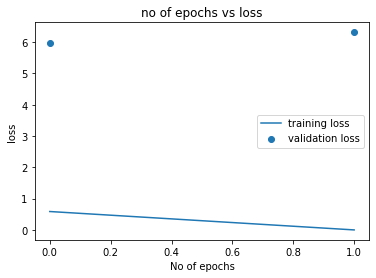

In [23]:
acc=history.history['loss']    ##getting  loss of each epochs
#epochs_=range(0,epochs)
epochs_ = range(len(acc))
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()

In [24]:
test.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [27]:
test = datagen.flow_from_dataframe(dataframe=test,directory=test_dir,x_col='Image',
                                            target_size=(224,224),color_mode='rgb')
ypred = model.predict_classes(test)

KeyError: 'class'